# Dota 2 game.

### Mahmud Mukthar Opeyemi 

Linkedin: https://www.linkedin.com/in/mahmudmukthar1084

# DATA DESCRIPTION
The Dota2 game data provided consist of 117 attributes. 113 attributes indicate the hero type while 4 other attributes are:

*Outcome* : This gives the outcome of the game -1 if team 2 wins and 1 if team 1 win

*Cluster ID* : This relate to the location at which the game was played (we made one-hot-encoding since this is categorical

*Game mode* : This represents the specific mode or rule set being used in a game, such as all pick, all random, or other game variations. This feature describes the rules and restrictions that players follow during the game.

*Game type* :  The "GAME-TYPE" feature represents different types of games in Dota 2, such as ranked, unranked, tournament matches, or other specific game modes. This feature captures the overall nature or purpose of the game being played. 


In [2]:
import numpy as np # data manipulation
import pandas as pd # load and manipulate data
import matplotlib.pyplot as plt # drawing graphs
import seaborn as sns # for scatterplots
import matplotlib.cm as cm
import matplotlib as mpl
import tensorflow as tf
import seaborn as sn


from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import plot_tree
from pandas import DataFrame
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


In [2]:
dota2Train = pd.read_csv('dota2Train.csv')
dota2Test = pd.read_csv('dota2Test.csv')
dota2Train 

,Outcome,Cluster ID,Game mode,Game type,1,2,3,4,5,6,...,104,105,106,107,108,109,110,111,112,113
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92645,-1,154,2,3,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
92646,1,154,2,2,0,0,0,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
92647,1,111,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92648,-1,185,2,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dota2Test

,Outcome,Cluster ID,Game mode,Game type,1,2,3,4,5,6,...,104,105,106,107,108,109,110,111,112,113
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,121,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10290,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1 DATA CLEANING


In [4]:
print(f"Number of variables: {len(dota2Train.columns)}")
print(f"Number of observations: {dota2Train.shape[0]}")
print(f"Missing Values: {dota2Train.isna().sum().sum()}")
print(f"Missing Values : {round(dota2Train.isna().sum().sum()/dota2Train.shape[0]*100,3)}")
print(f"Duplicate rows: {dota2Train[dota2Train.duplicated(keep=False)].shape[0]}")
print(f"Duplicate rows (%): {round(dota2Train[dota2Train.duplicated(keep='first')].shape[0]/dota2Train.shape[0]*100,3)}")
print("Variable types: ")
a=pd.crosstab(dota2Train.dtypes,columns="Count")
for i in pd.crosstab(dota2Train.dtypes,columns="Count").index:
    print("\t"+str(i).split()[0],a.loc[i][0])

Number of variables: 117
Number of observations: 92650
Missing Values: 0
Missing Values : 0.0
Duplicate rows: 0
Duplicate rows (%): 0.0
Variable types: 
	int64 117


In [5]:
print(f"Number of variables: {len(dota2Test.columns)}")
print(f"Number of observations: {dota2Test.shape[0]}")
print(f"Missing Values: {dota2Test.isna().sum().sum()}")
print(f"Missing Values : {round(dota2Test.isna().sum().sum()/dota2Test.shape[0]*100,3)}")
print(f"Duplicate rows: {dota2Test[dota2Test.duplicated(keep=False)].shape[0]}")
print(f"Duplicate rows (%): {round(dota2Test[dota2Test.duplicated(keep='first')].shape[0]/dota2Test.shape[0]*100,3)}")
print("Variable types: ")
a=pd.crosstab(dota2Test.dtypes,columns="Count")
for i in pd.crosstab(dota2Test.dtypes,columns="Count").index:
    print("\t"+str(i).split()[0],a.loc[i][0])

Number of variables: 117
Number of observations: 10294
Missing Values: 0
Missing Values : 0.0
Duplicate rows: 0
Duplicate rows (%): 0.0
Variable types: 
	int64 117


In [6]:
dota2Train.isnull().sum()

Outcome       0
Cluster ID    0
Game mode     0
Game type     0
1             0
             ..
109           0
110           0
111           0
112           0
113           0
Length: 117, dtype: int64

In [7]:
dota2Test.notnull().sum()

Outcome       10294
Cluster ID    10294
Game mode     10294
Game type     10294
1             10294
              ...  
109           10294
110           10294
111           10294
112           10294
113           10294
Length: 117, dtype: int64

**DATA CONTAINS NO NULL VALUES**

In [8]:
# Check for duplicates
print(dota2Train.duplicated().sum())
print(dota2Test.duplicated().sum())

print(f"Duplicate rows: {dota2Train[dota2Train.duplicated(keep=False)].shape[0]}")
print(f"Duplicate rows: {dota2Test[dota2Test.duplicated(keep=False)].shape[0]}")

0
0
Duplicate rows: 0
Duplicate rows: 0


## MERGING DATASET

In [9]:
Complete = pd.concat([dota2Train, dota2Test], axis=0)
Complete

,Outcome,Cluster ID,Game mode,Game type,1,2,3,4,5,6,...,104,105,106,107,108,109,110,111,112,113
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,1,121,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
10290,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(f"Number of variables: {len(Complete.columns)}")
print(f"Number of observations: {Complete.shape[0]}")
print(f"Missing Values: {Complete.isna().sum().sum()}")
print(f"Missing Values : {round(Complete.isna().sum().sum()/Complete.shape[0]*100,3)}")
print(f"Duplicate rows: {Complete[Complete.duplicated(keep=False)].shape[0]}")
print(f"Duplicate rows (%): {round(Complete[Complete.duplicated(keep='first')].shape[0]/Complete.shape[0]*100,3)}")
print("Variable types: ")
a=pd.crosstab(Complete.dtypes,columns="Count")
for i in pd.crosstab(Complete.dtypes,columns="Count").index:
    print("\t"+str(i).split()[0],a.loc[i][0])

Number of variables: 117
Number of observations: 102944
Missing Values: 0
Missing Values : 0.0
Duplicate rows: 0
Duplicate rows (%): 0.0
Variable types: 
	int64 117


## CHANGEING OUTCOME COLUMN
OUTCOME COLUMN CAN BE CHANGED TO ZERO AND 1 WHERE ZERO MEANS TEAM -1 WIN AND 1 MEANS TEAM 1 WIN

In [11]:
#Complete['Outcome'] = (Complete['Outcome'] + 1) / 2
#Complete

In [12]:
#Complete['Outcome']=Complete['Outcome'].astype(int) 

In [13]:
#Complete['Outcome'].dtypes
#Complete

In [14]:
Complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102944 entries, 0 to 10293
Columns: 117 entries, Outcome to 113
dtypes: int64(117)
memory usage: 92.7 MB


**DATA CONTAIN NO DUPLICATE VALUES**

### DATA CLEANING RESULTS
- Missing values check
    - dataframe has no missing values as stated on the source website which we confirmed in this section.
- Duplicate rows check
    - no duplicate rows were found in both training and testing data

## 2-Exploratory Analysis

### Exploring attribute distributions for the 4 columns for the Complete set

In [15]:
DataVariables = Complete[["Outcome","Cluster ID", "Game mode","Game type"]]
DataVariables

,Outcome,Cluster ID,Game mode,Game type
0,-1,223,2,2
1,1,152,2,2
2,1,131,2,2
3,1,154,2,2
4,-1,171,2,3
...,...,...,...,...
10289,1,121,2,2
10290,1,154,9,2
10291,1,122,9,2
10292,1,152,2,3


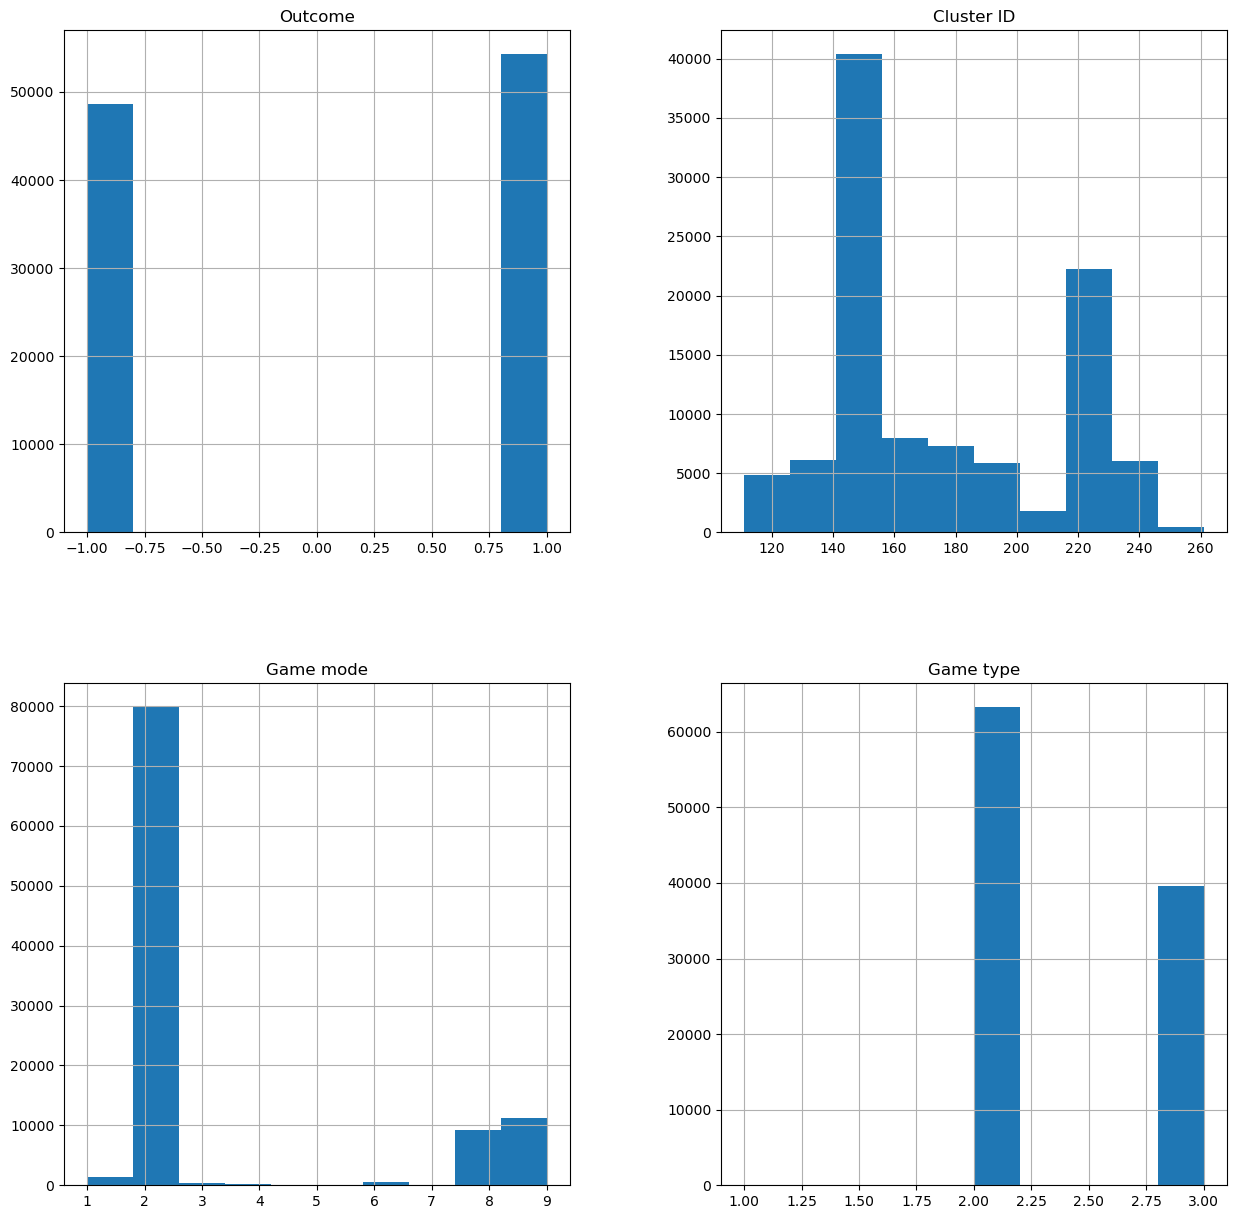

In [16]:
# Plot histograms of numerical attributes
DataVariables.hist(figsize=      (15, 15))
plt.show()

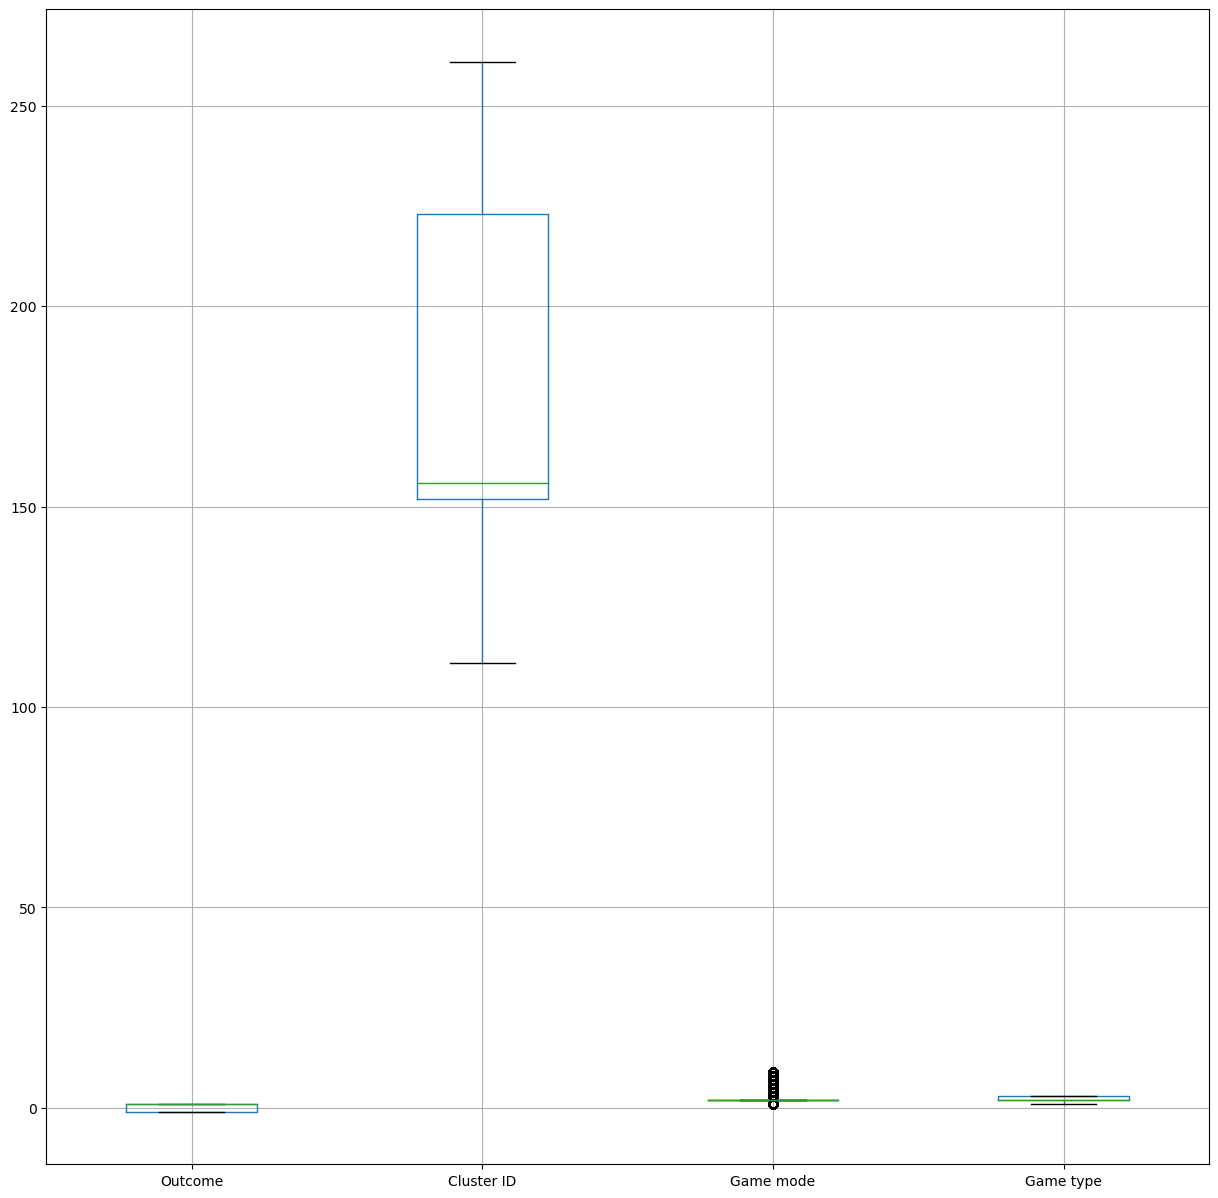

In [17]:
# Plot box plots of numerical attributes
DataVariables.boxplot(figsize=(15, 15))
plt.show()

### Analyzing relationships and patterns:

### Split DATA

In [18]:
X = Complete.copy()
X = Complete.drop(['Outcome', 'Cluster ID'], axis = 1) # drop column(s)
y = Complete['Outcome'] # use first column as y i.e dependent variableb

In [19]:
X.shape

(102944, 115)

Remove highly correlating Variables

In [20]:
#corr_matrix = X.corr()
corr_matrix = X.corr().abs()
corr_matrix2 = DataVariables.corr().abs()
corr_matrix2

,Outcome,Cluster ID,Game mode,Game type
Outcome,1.000000,0.000085,0.001003,0.000822
Cluster ID,0.000085,1.000000,0.183974,0.001243
Game mode,0.001003,0.183974,1.000000,0.149547
Game type,0.000822,0.001243,0.149547,1.000000


In [21]:
# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))

In [22]:
# find features with correlation greater than 0.85

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [23]:
to_drop

[]

verdict: no highly correlating columns

In [24]:
# drop highly correlated features

X.drop(to_drop, axis=1, inplace=True)
X.shape

(102944, 115)

<Axes: >

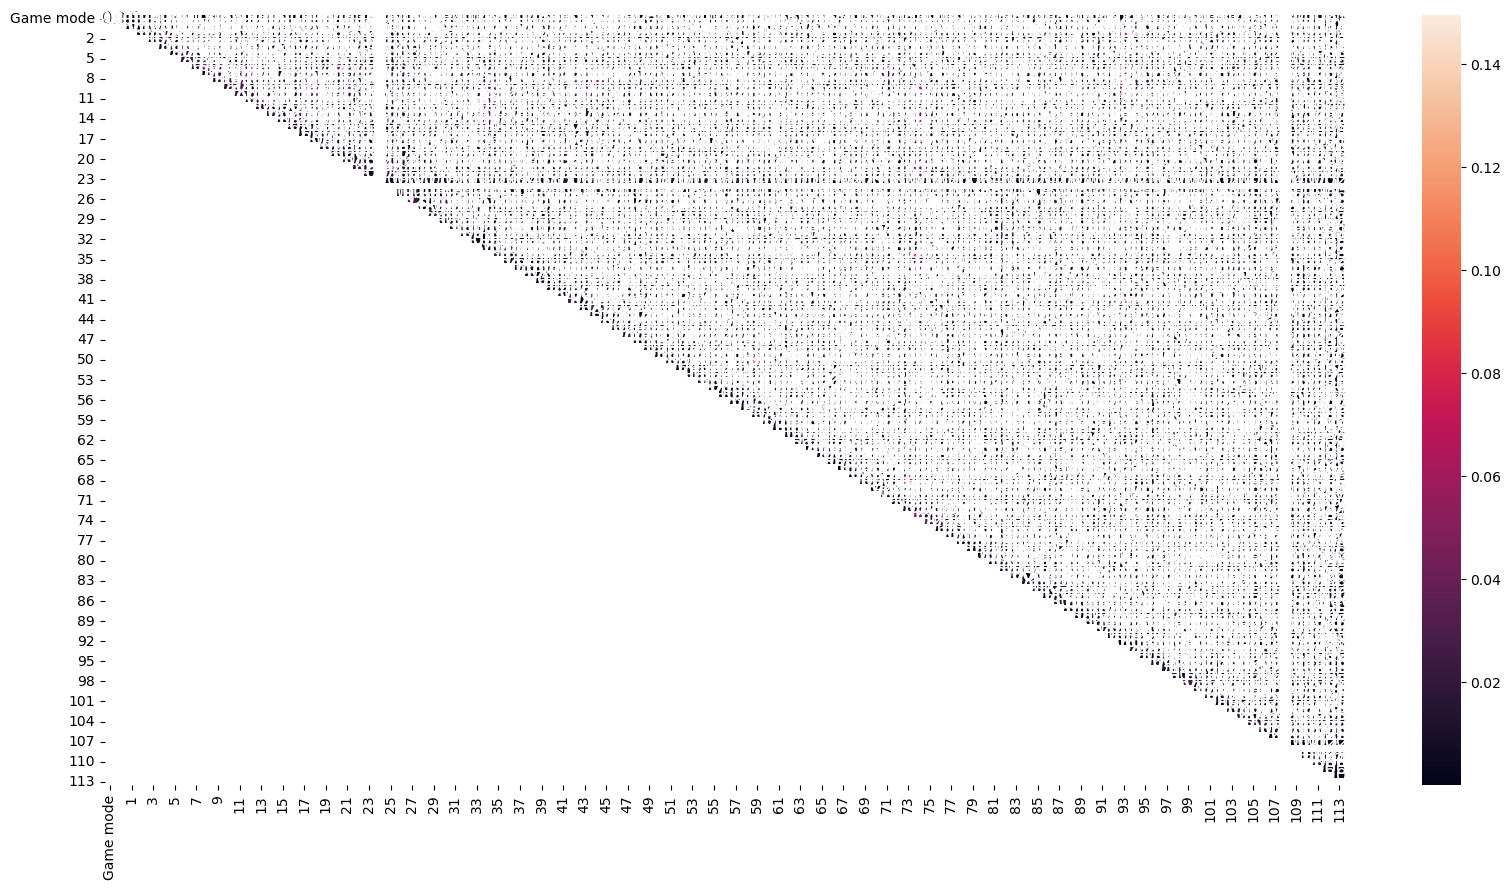

In [25]:
 plt.figure(figsize=(20,10))
 sns.heatmap(upper, annot=True, annot_kws={"fontsize":13}) # check correlation between the independent variables

<Axes: >

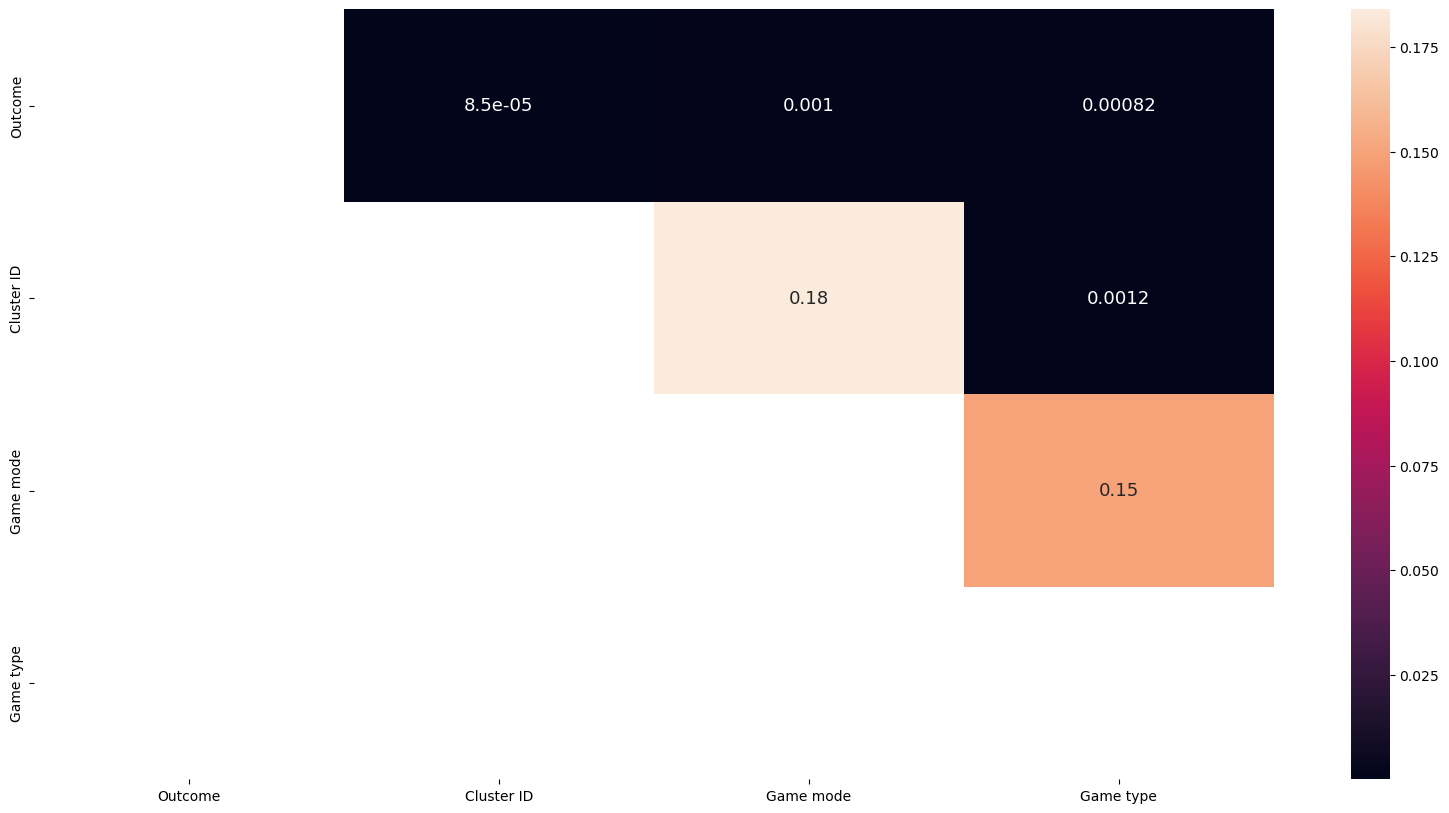

In [26]:
 plt.figure(figsize=(20,10))
 sns.heatmap(upper2, annot=True, annot_kws={"fontsize":13}) # check correlation between the independent variables

### Correlation between each Attributes and the outcome 

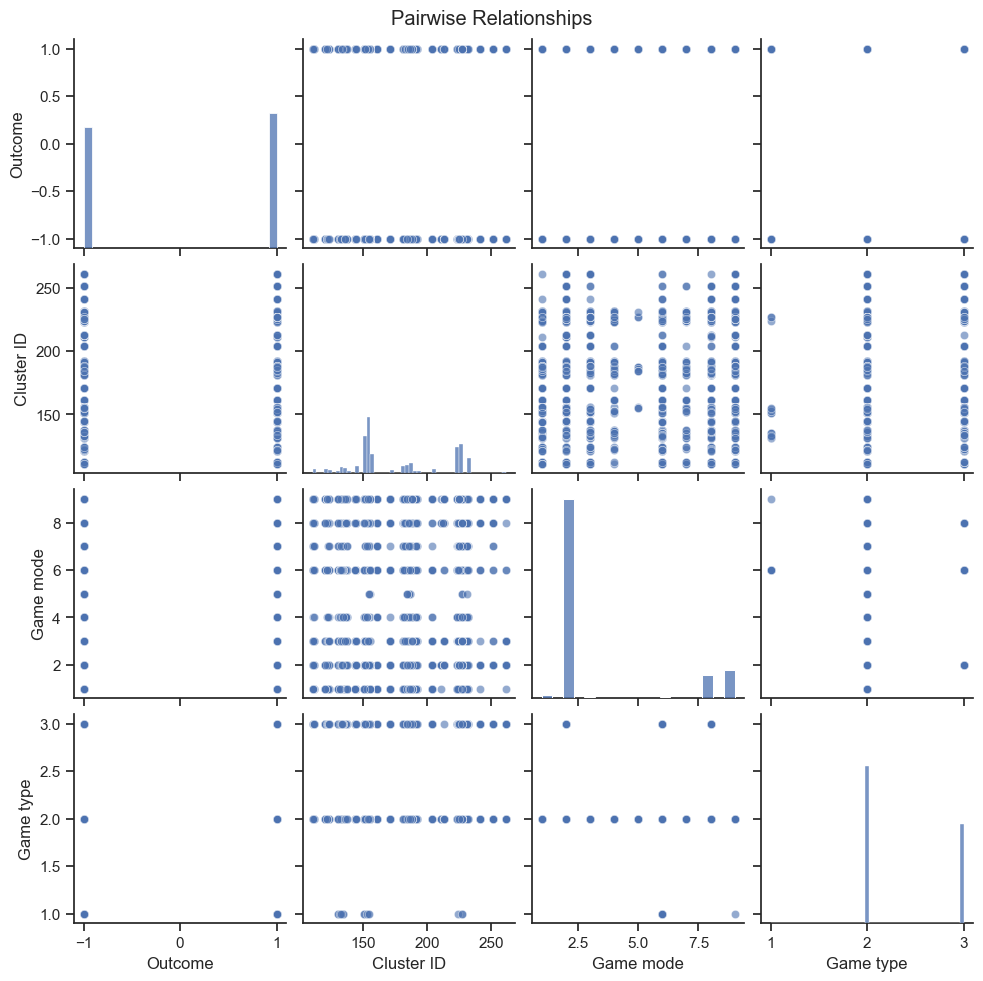

In [27]:
sns.set(style='ticks')
sns.pairplot(DataVariables, diag_kind='hist', plot_kws={'alpha': 0.6})

# Adjust the plot layout
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Relationships')

# Display the plot
plt.show()

## Applying PCA

In [28]:
scaler = StandardScaler()
#StandardScaler is a preprocessing class that standardizes features by subtracting the mean and dividing by the standard deviation.
scaler.fit(X)
#The fit() method calculates the mean and standard deviation of each feature in the 'project' dataset
Data_scaled = scaler.transform(X)
#Applies the learned transformation (mean subtraction and division by standard deviation) to the 'project' dataset. It returns a new dataset

print(Data_scaled)
print(f'mean of scaled features {np.mean(Data_scaled,0)}')
print(f'st.dev. of scaled features {np.std(Data_scaled,0)}')
#The np.std() function from NumPy is used to calculate the standard deviation along each column (axis 0) of data_scaled.

[[-5.00886679e-01 -7.90540119e-01  4.03924368e-03 ...  1.72620086e-03
   4.11134235e-04 -6.17329248e-03]
 [-5.00886679e-01 -7.90540119e-01  4.03924368e-03 ...  1.72620086e-03
   4.11134235e-04 -6.17329248e-03]
 [-5.00886679e-01 -7.90540119e-01  4.03924368e-03 ...  1.72620086e-03
   4.11134235e-04 -6.17329248e-03]
 ...
 [ 2.15546896e+00 -7.90540119e-01  4.03924368e-03 ...  1.72620086e-03
   4.11134235e-04 -6.17329248e-03]
 [-5.00886679e-01  1.26288545e+00  4.03924368e-03 ...  1.72620086e-03
   4.11134235e-04 -6.17329248e-03]
 [-5.00886679e-01  1.26288545e+00  4.03924368e-03 ...  1.72620086e-03
   4.11134235e-04 -6.17329248e-03]]
mean of scaled features [ 1.28381400e-17  4.42018542e-16  2.31914788e-17  2.42958349e-17
 -4.48644679e-17  2.37436569e-17 -2.37436569e-17  5.13525602e-17
  1.14576949e-17 -7.15070596e-17  3.18192611e-17 -6.51570118e-17
 -6.55711454e-18 -2.38126791e-17 -1.58751194e-18 -8.28267100e-19
 -9.39392935e-17  1.44946742e-17  3.36828620e-17 -2.80230369e-17
 -1.93262323e-1

In [29]:
Data_scaled.shape

(102944, 115)

C:\Users\Mahmud\AppData\Local\Temp\ipykernel_15468\3503471142.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=DataVariables['Outcome'], cmap=plt.cm.get_cmap('inferno',6))


PVE:[0.40450327 0.02062245], cumulative PVE:0.42512572415941874


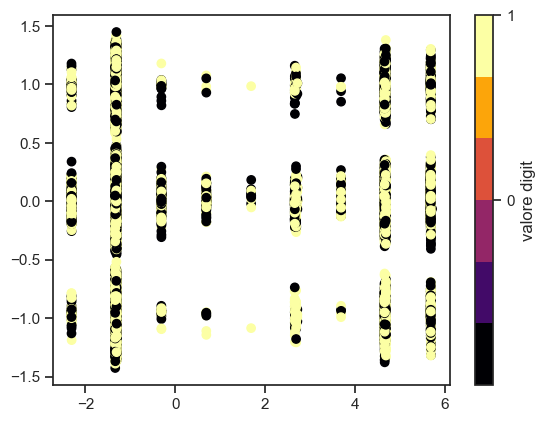

In [30]:
pca_model = PCA(n_components=2)
pca_coordinates = pca_model.fit_transform(X)
plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=DataVariables['Outcome'], cmap=plt.cm.get_cmap('inferno',6))
plt.colorbar(ticks=range(6), label='valore digit')
PVE = pca_model.explained_variance_ratio_
PVE_cum = np.sum(PVE)
print(f'PVE:{PVE}, cumulative PVE:{PVE_cum}')

[0.40450327 0.02062357 0.01943374 0.01813778 0.01701843 0.01565377
 0.01486281 0.01372    0.0134878  0.01326198]
0.40450327025800553


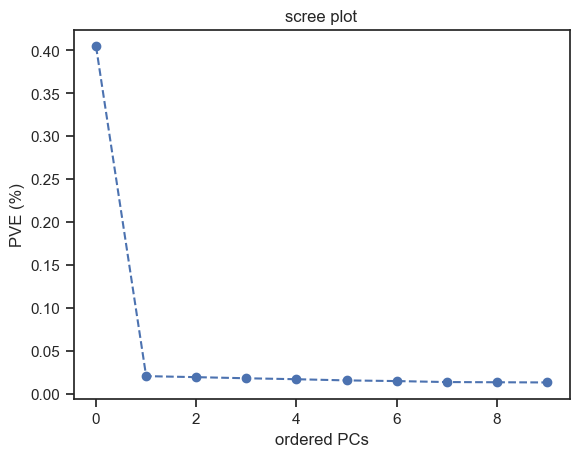

In [31]:
pca_model = PCA(n_components=10)
pca_coordinates = pca_model.fit_transform(X)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:1]))

### K Means Clustering

In [36]:
K = 20
kmeans_model = KMeans(n_clusters=K, init='random', n_init=10)
kmeans_model.fit(Data_scaled)
y = kmeans_model.labels_
print(f'obtained clustering \n {y}\n')
print(f'clusters centroids\n {kmeans_model.cluster_centers_}\n')
print(f'final overall distance points-centroids {kmeans_model.inertia_}')

obtained clustering 
 [15 14 14 ...  5 16 16]

clusters centroids
 [[ 1.70447045e-01 -1.25485597e-01 -3.95511890e-02 ...  6.96674101e-02
   8.66428481e-02 -7.59264326e-02]
 [ 7.31242175e-02 -6.28985873e-03 -2.57993818e-03 ... -3.19223864e+00
   6.13559099e-02 -1.08562372e-01]
 [ 1.69496644e-01 -6.76066713e-02  3.08285326e-02 ...  7.96190970e-02
   2.28356905e+00 -5.14973288e-02]
 ...
 [ 2.75399901e-01 -1.83754874e-01  5.11413649e-02 ...  5.59012825e-03
   1.42153752e-02 -9.56781626e-02]
 [ 1.60560033e-01 -2.87332618e-02 -1.19442017e-03 ... -1.69497866e-02
   9.49335522e-02 -7.06860126e-02]
 [ 2.48288769e-01 -2.50968701e-01  1.63838921e-02 ...  1.93466293e-02
   6.59847006e-02 -4.55574906e-02]]

final overall distance points-centroids 10760990.36707082


C:\Users\Mahmud\AppData\Local\Temp\ipykernel_15468\275544207.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('inferno',5))


10794914.547993748


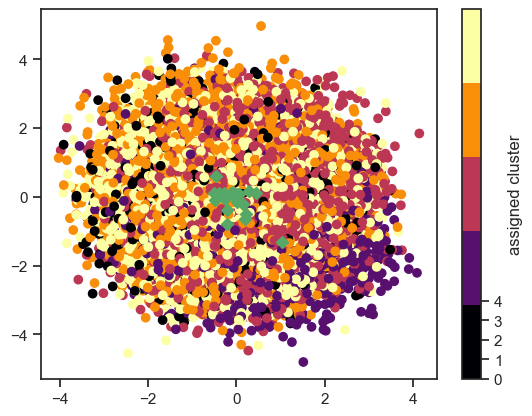

In [37]:
kmeans_model = KMeans(n_clusters=K, init='random', n_init=1)
kmeans_model.fit(Data_scaled)
y = kmeans_model.labels_
pca_model = PCA(n_components=2)
pca_coordinates = pca_model.fit_transform(Data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=y,\
            cmap=plt.cm.get_cmap('inferno',5))
plt.colorbar(ticks=range(5), label='assigned cluster')
for i in range(K):
    plt.plot(pca_centroids[i,0], pca_centroids[i,1] ,'gD') 
print(kmeans_model.inertia_)

overall clustering silhouette 0.005771209416948012


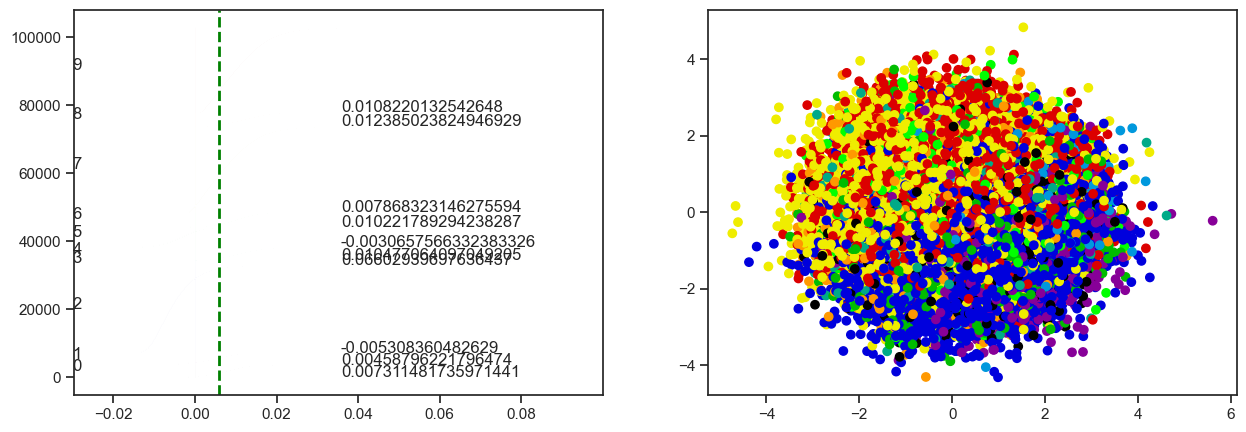

In [35]:

# Calculate the overall silhouette score for the clustering result
silhouette_avg = silhouette_score(Data_scaled, y)
# Calculate the silhouette score for each data point
sample_silhouette_values = silhouette_samples(Data_scaled, y)

print(f'overall clustering silhouette {silhouette_avg}')

# Create a figure with two subplots
fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0

# Iterate over each cluster in the clustering result
for i,cluster in enumerate(np.unique(y)):
    # Get the silhouette values for the current cluster
    cluster_silhouette_vals = sample_silhouette_values[y == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    # Update the upper limit for plotting
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    
    # Plot the silhouette values for the current cluster
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
     # Add a label indicating the cluster number
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    # Add the mean silhouette value for the current cluster
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)
    
# Add a vertical line indicating the average silhouette score
ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(y.astype(float) / K)
# Scatter plot of the data points in the reduced 2D space

ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)


*Observation:* Since our Silhouette score is near zero (0) it indicates overlapping or ambiguous clusters. It means that the samples could be assigned to multiple clusters with similar distances. This suggests a lack of distinct separation between clusters and may indicate that the clustering algorithm didn't perform well in separating the data points.

# 3. Supervised Learning 

### Scaling X features

In [38]:
norm = StandardScaler()
columns = X.columns
X_norm = norm.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns = columns)

In [7]:
X_train = dota2Train.copy()
X_train = dota2Train.drop(['Outcome', 'Cluster ID'], axis = 1) # drop column(s)
y_train = dota2Train['Outcome'] # use first column as y i.e dependent variableb

In [8]:
X_test = dota2Test.copy()
X_test = dota2Test.drop(['Outcome', 'Cluster ID'], axis = 1) # drop column(s)
y_test = dota2Test['Outcome'] # use first column as y i.e dependent variableb

In [9]:
norm = StandardScaler()
columns = X_train.columns
X_train = norm.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns = columns)

In [10]:
norm = StandardScaler()
columns = X_test.columns
X_test = norm.fit_transform(X_test)

X_test = pd.DataFrame(X_test, columns = columns)

In [11]:
X_test.shape[1]

115

In [12]:
y_train.value_counts(), y_test.value_counts() #values in response variable for both y train and test.

( 1    48782
 -1    43868
 Name: Outcome, dtype: int64,
  1    5502
 -1    4792
 Name: Outcome, dtype: int64)

## A Evaluate model based on **predictability** Using Logistics Regression Model.

In [45]:
lr = LogisticRegression(random_state=0, max_iter=2500)

In [46]:
params_lr = {
    'penalty': ['l1','l2', 'elasticnet', 'none'],
    'l1_ratio' : np.arange(0., 1.0, 0.1),
    'solver' : ['saga'],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001]
}

In [47]:
# Instantiate the grid search model
grid_search_lr = GridSearchCV(estimator=lr,
                           param_grid=params_lr,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#### For hyperparameters selection

In [48]:
%%time
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 7.3 s
Wall time: 17min 36s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2500, random_state=0),
             n_jobs=-1,
             param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga'],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=1)

### Best score for the hyperparameters are below:

In [49]:
grid_search_lr.best_score_, grid_search_lr.best_estimator_

(0.5990393955747437,
 LogisticRegression(l1_ratio=0.30000000000000004, max_iter=2500,
                    penalty='elasticnet', random_state=0, solver='saga',
                    tol=0.01))

In [50]:
lr_best = grid_search_lr.best_estimator_

### Fitting data on best hyperparameter and predicting the testing data result

In [59]:
%%time
lr_best.fit(X_train, y_train) 

y_predicted_test = lr_best.predict(X_test)
print(f'\u03B20 and \u03B21 are {lr_best.intercept_} and {lr_best.coef_}')

β0 and β1 are [0.11303609] and [[ 0.00070767 -0.00546834 -0.04789244  0.05892505 -0.03641921  0.01266743
   0.06938779  0.07213126  0.00834593  0.01456504  0.11041007 -0.0022561
  -0.05802717 -0.04895559 -0.05656573  0.03635185 -0.03177221  0.00073175
  -0.04136597  0.08034273 -0.06103509  0.02854158 -0.11068723  0.05892711
  -0.0095185   0.         -0.07606766 -0.02355789  0.03534573  0.02424231
   0.02906548  0.00651409  0.0330943   0.09252378  0.02190119 -0.06587843
   0.0046463   0.08984435  0.03704851 -0.01105075 -0.09880099  0.02170875
   0.01106021  0.08340449 -0.0329852   0.03346402 -0.02058712 -0.06115876
  -0.01634903  0.05291288 -0.00447202  0.01470546 -0.00080669 -0.04553305
  -0.10061636 -0.00216436 -0.00346953 -0.04950819  0.14074112 -0.07789676
  -0.0545906   0.00667603 -0.07756564 -0.01992945 -0.00840737  0.01593296
  -0.04105926 -0.03277204  0.06744646  0.01223326 -0.03926543  0.05418368
   0.03195505 -0.04507072 -0.01553191 -0.1006878   0.0600211  -0.01583197
  -0.031

In [54]:
%%time
y_pred_train = lr_best.predict(X_train)

CPU times: total: 15.6 ms
Wall time: 23.1 ms


### Confusion matrix for the testing data

[[2475 2317]
 [1819 3683]]
[-1  1  1 ...  1  1  1]


C:\Users\Mahmud\.conda\envs\Coded00\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Mahmud\.conda\envs\Coded00\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


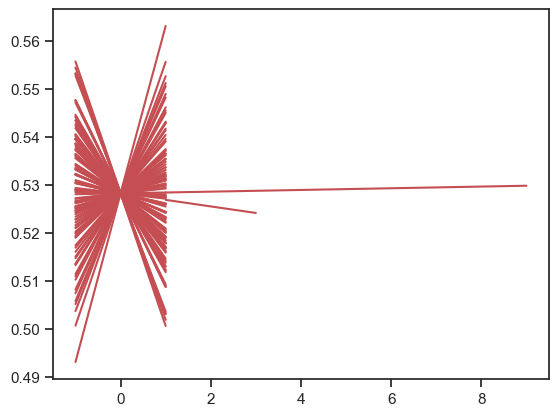

In [69]:
y_predicted_test = lr_best.predict(X_test)
print(confusion_matrix(y_test, y_predicted_test))

#plt.scatter(X_test, y_test, c=y_test, cmap='plasma')
log_f_domain = np.linspace(np.min(X), np.max(X), 100)
log_f_image = 1/(1+np.exp(-lr_best.intercept_-lr_best.coef_*log_f_domain))
plt.plot(log_f_domain, log_f_image, 'r-')
print(lr_best.predict(X_test))

### Confusion matrix for the training data

[[22546 21322]
 [15653 33129]]
[1 1 1 ... 1 1 1]


C:\Users\Mahmud\.conda\envs\Coded00\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Mahmud\.conda\envs\Coded00\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


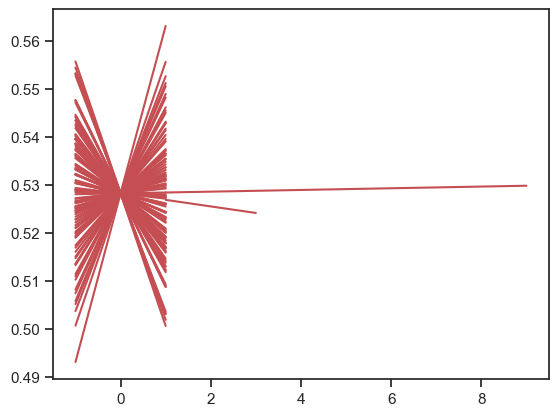

In [70]:
y_predicted_train = lr_best.predict(X_train)
print(confusion_matrix(y_train, y_predicted_train))

#plt.scatter(X_test, y_test, c=y_test, cmap='plasma')
log_f_domain = np.linspace(np.min(X), np.max(X), 100)
log_f_image = 1/(1+np.exp(-lr_best.intercept_-lr_best.coef_*log_f_domain))
plt.plot(log_f_domain, log_f_image, 'r-')
print(lr_best.predict(X_train))

### Evaluating quality of Model on Test Data

In [72]:
print('*************** Evaluation on Test Data ***************')
score_te = lr_best.score(X_test, y_test)
pred_labels_te = lr_best.predict(X_test)
print('Accuracy Score: ', score_te)

# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
# print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5982125510005829
              precision    recall  f1-score   support

          -1       0.58      0.52      0.54      4792
           1       0.61      0.67      0.64      5502

    accuracy                           0.60     10294
   macro avg       0.60      0.59      0.59     10294
weighted avg       0.60      0.60      0.60     10294

--------------------------------------------------------


### Evaluating quality of Model on Training Data

In [74]:
print('*************** Evaluation on Train Data ***************')
score_te = lr_best.score(X_train, y_train)
pred_labels_te = lr_best.predict(X_train)
print('Accuracy Score: ', score_te)

# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_te))
print('--------------------------------------------------------')
# print("")

*************** Evaluation on Train Data ***************
Accuracy Score:  0.6009174311926605
              precision    recall  f1-score   support

          -1       0.59      0.51      0.55     43868
           1       0.61      0.68      0.64     48782

    accuracy                           0.60     92650
   macro avg       0.60      0.60      0.60     92650
weighted avg       0.60      0.60      0.60     92650

--------------------------------------------------------


In [71]:
training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train)
training_precision = precision_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test)
testing_precision = precision_score(y_test, y_predicted_test)
print('           ACC               BA                RECALL                  PRECISION')
print(f'training {training_acc},{training_ba},{training_recall},{training_precision}')
print(f'testing {testing_acc},{testing_ba},{testing_recall},{testing_precision}')

           ACC               BA                RECALL                  PRECISION
training 0.6009174311926605,0.5965371954567247,0.6791234471731377,0.6084185781711998
testing 0.5982125510005829,0.5929393788508535,0.6693929480189023,0.6138333333333333


The values of the balance accuracy and accuracy score shows the model does not overfit the testing data

### Feature Importance

In [75]:
feat_impt_lr = pd.DataFrame( {'feat_impt_lr' : lr_best.feature_names_in_, 'value_lr' : lr_best.coef_[0]})
feat_impt_lr.sort_values(by = 'value_lr', inplace = True, ascending=False)

In [78]:
feat_impt_lr[:5] 

,feat_impt_lr,value_lr
58,57,0.140741
10,9,0.110410
104,103,0.098298
33,32,0.092524
37,36,0.089844


In [79]:
feat_impt_lr[-5:] 

,feat_impt_lr,value_lr
40,39,-0.098801
54,53,-0.100616
75,74,-0.100688
107,106,-0.105554
22,21,-0.110687


In [80]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

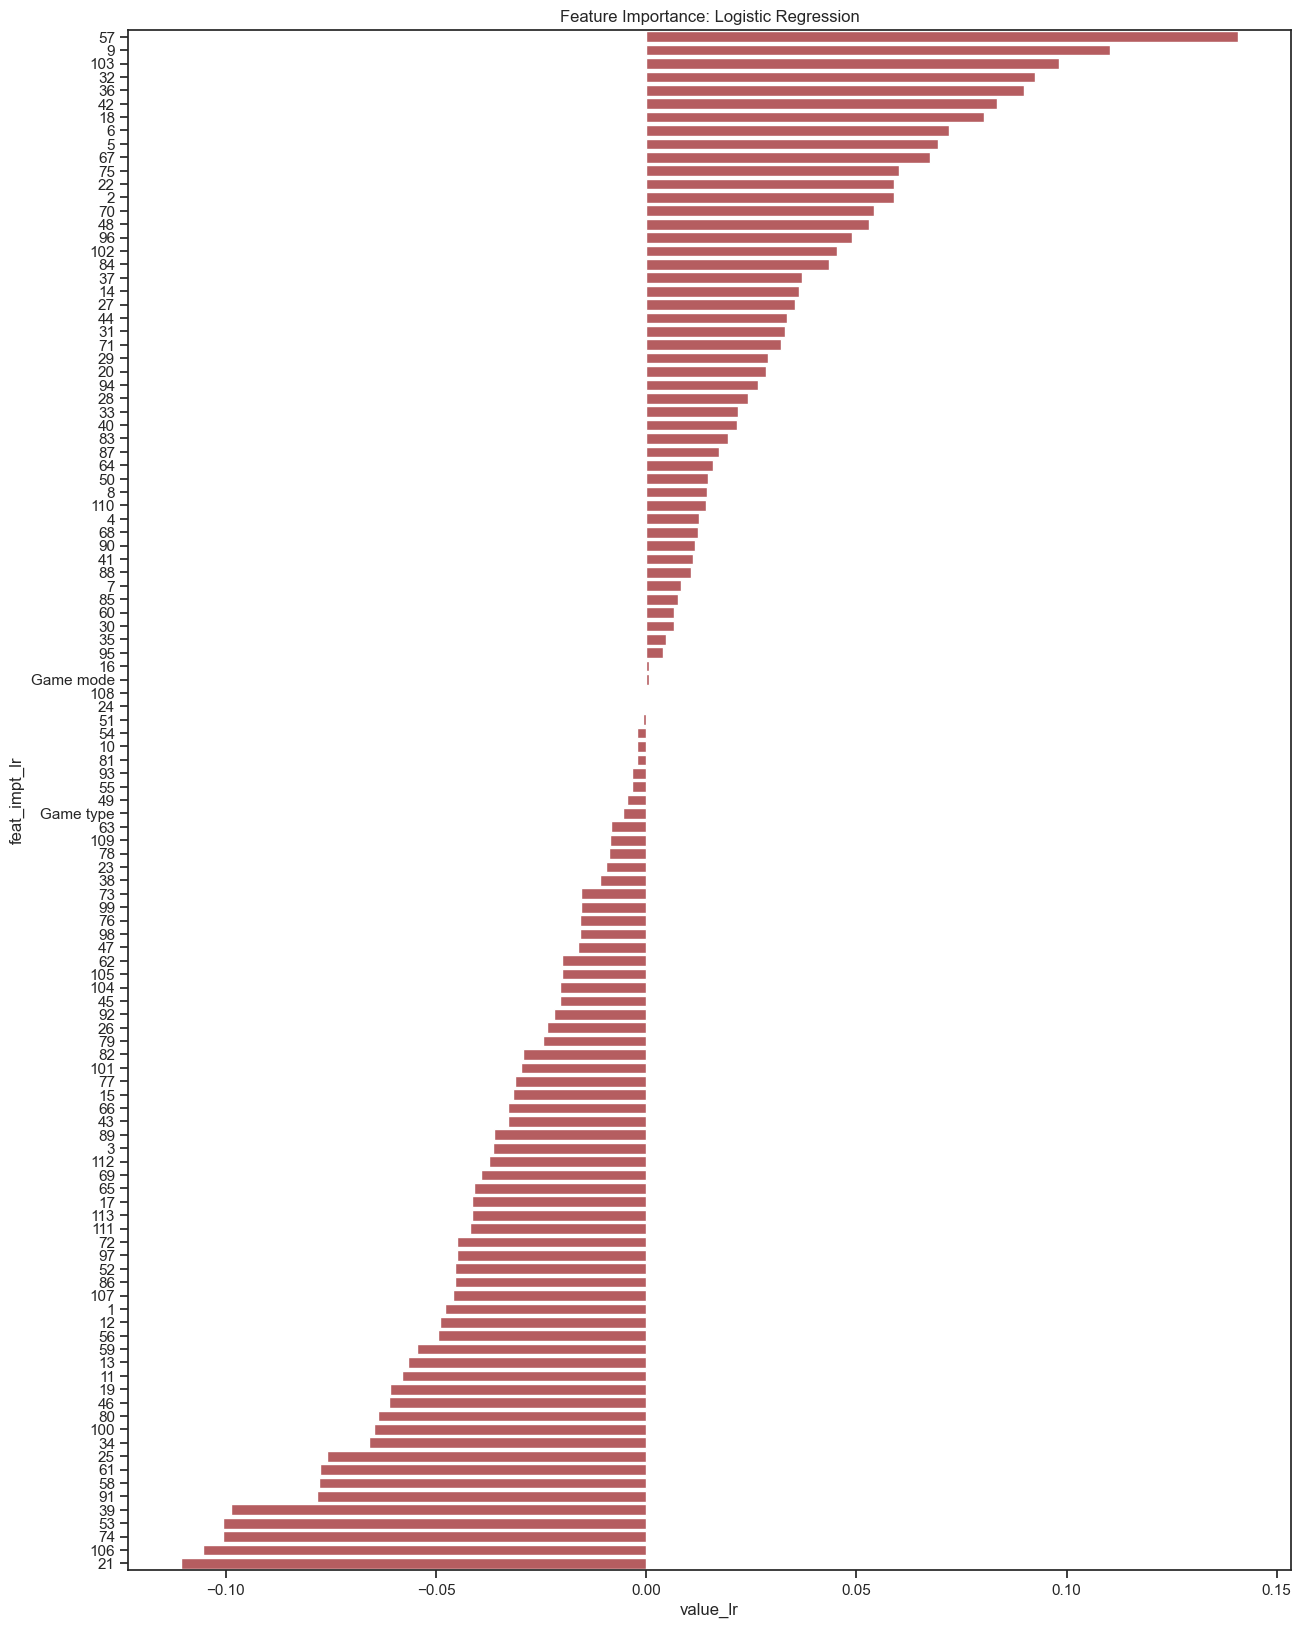

In [82]:
plt.figure(figsize = (15, 20))
sns.barplot(y = 'feat_impt_lr', x = 'value_lr', color = sns.color_palette()[3],
            data = feat_impt_lr).set(title = 'Feature Importance: Logistic Regression');

#### Plotting the correlation matrix between the obtained important (+5 and -5 features)

In [93]:
DataBest = Complete[['Outcome','58','10','104','33','37','40','54','75','107','22']]
DataBest

,Outcome,58,10,104,33,37,40,54,75,107,22
0,-1,0,1,0,0,0,0,0,0,0,-1
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,-1,0,0,0,1,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10289,1,0,0,0,0,0,0,0,0,0,1
10290,1,0,0,0,0,1,0,0,0,0,1
10291,1,0,0,0,0,1,0,0,0,0,0
10292,1,0,0,0,0,0,0,1,1,0,-1


In [94]:
corr_matrix3 = DataBest.corr().abs()
corr_matrix3

,Outcome,58,10,104,33,37,40,54,75,107,22
Outcome,1.000000,0.035497,0.001228,0.012316,0.010909,0.018211,0.008568,0.001850,0.027642,0.024381,0.031011
58,0.035497,1.000000,0.005305,0.015946,0.016023,0.004513,0.008991,0.012652,0.003677,0.000365,0.007802
10,0.001228,0.005305,1.000000,0.012894,0.005856,0.002410,0.009515,0.013954,0.006924,0.003863,0.006347
104,0.012316,0.015946,0.012894,1.000000,0.023375,0.006984,0.011071,0.048374,0.006239,0.004915,0.003694
33,0.010909,0.016023,0.005856,0.023375,1.000000,0.002917,0.004767,0.015153,0.021052,0.009432,0.008093
37,0.018211,0.004513,0.002410,0.006984,0.002917,1.000000,0.010127,0.003229,0.009371,0.006965,0.006280
40,0.008568,0.008991,0.009515,0.011071,0.004767,0.010127,1.000000,0.003804,0.010559,0.004501,0.006615
54,0.001850,0.012652,0.013954,0.048374,0.015153,0.003229,0.003804,1.000000,0.008296,0.005987,0.005745
75,0.027642,0.003677,0.006924,0.006239,0.021052,0.009371,0.010559,0.008296,1.000000,0.005202,0.015165
107,0.024381,0.000365,0.003863,0.004915,0.009432,0.006965,0.004501,0.005987,0.005202,1.000000,0.003420


<Axes: >

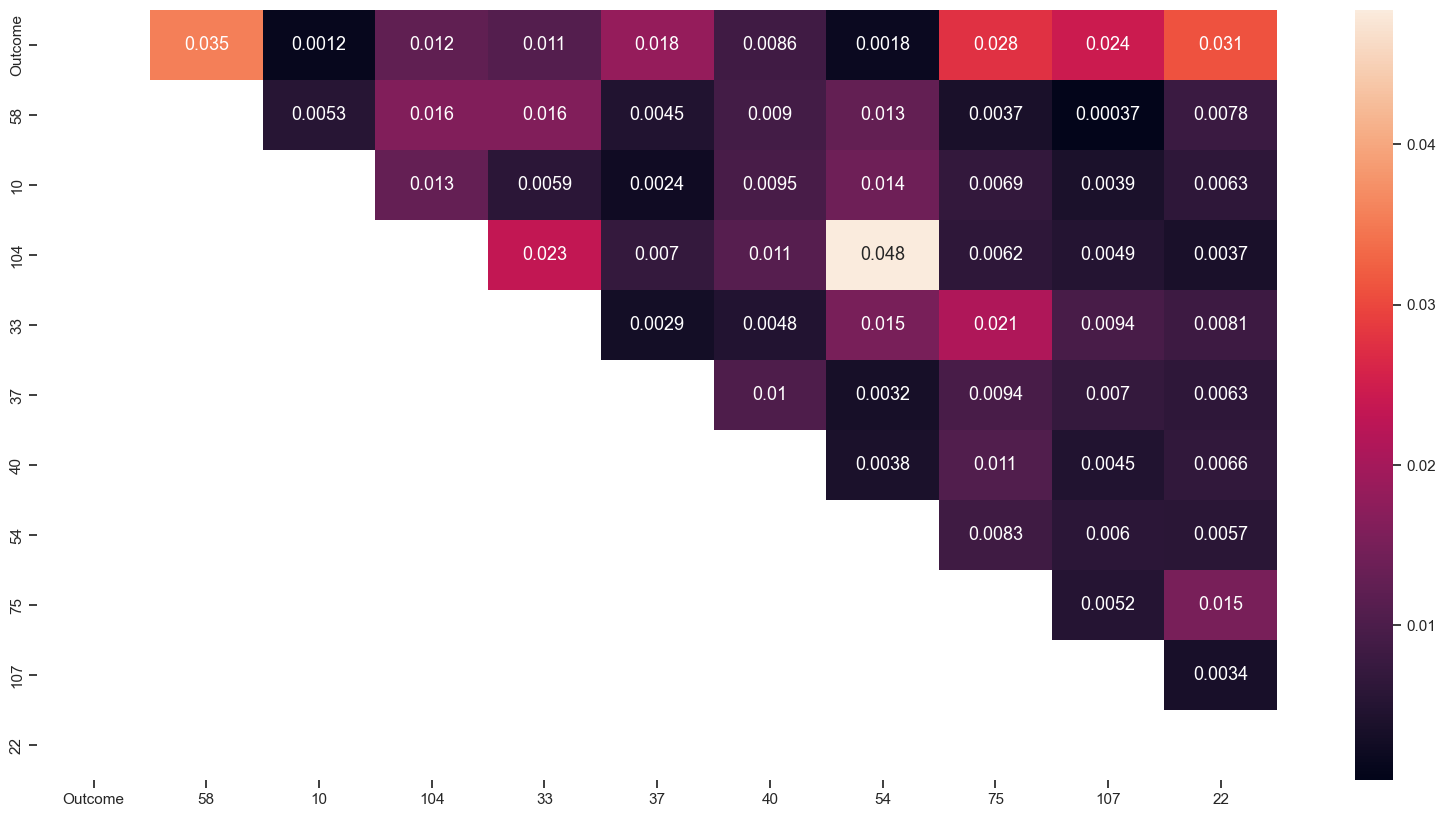

In [95]:
upper3 = corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape), k=1).astype(bool))
plt.figure(figsize=(20,10))
sns.heatmap(upper3, annot=True, annot_kws={"fontsize":13}) # check correlation between the independent variables

# B. Applying Decision TREE for classification

In [14]:
X_column_names = X_train.columns.tolist()
print(X_column_names)

['Game mode', 'Game type', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113']


In [17]:
%%time
data = X_train
target = y_train
print(data.shape)
print(target)
feat_names = X_column_names
targ_names = "Outcome"

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')

(92650, 115)
0       -1
1        1
2        1
3        1
4       -1
        ..
92645   -1
92646    1
92647    1
92648   -1
92649   -1
Name: Outcome, Length: 92650, dtype: int64
training accuracy 1.0
 testing accuracy 0.5262288711870993
CPU times: total: 4.36 s
Wall time: 6.68 s


We obtained 

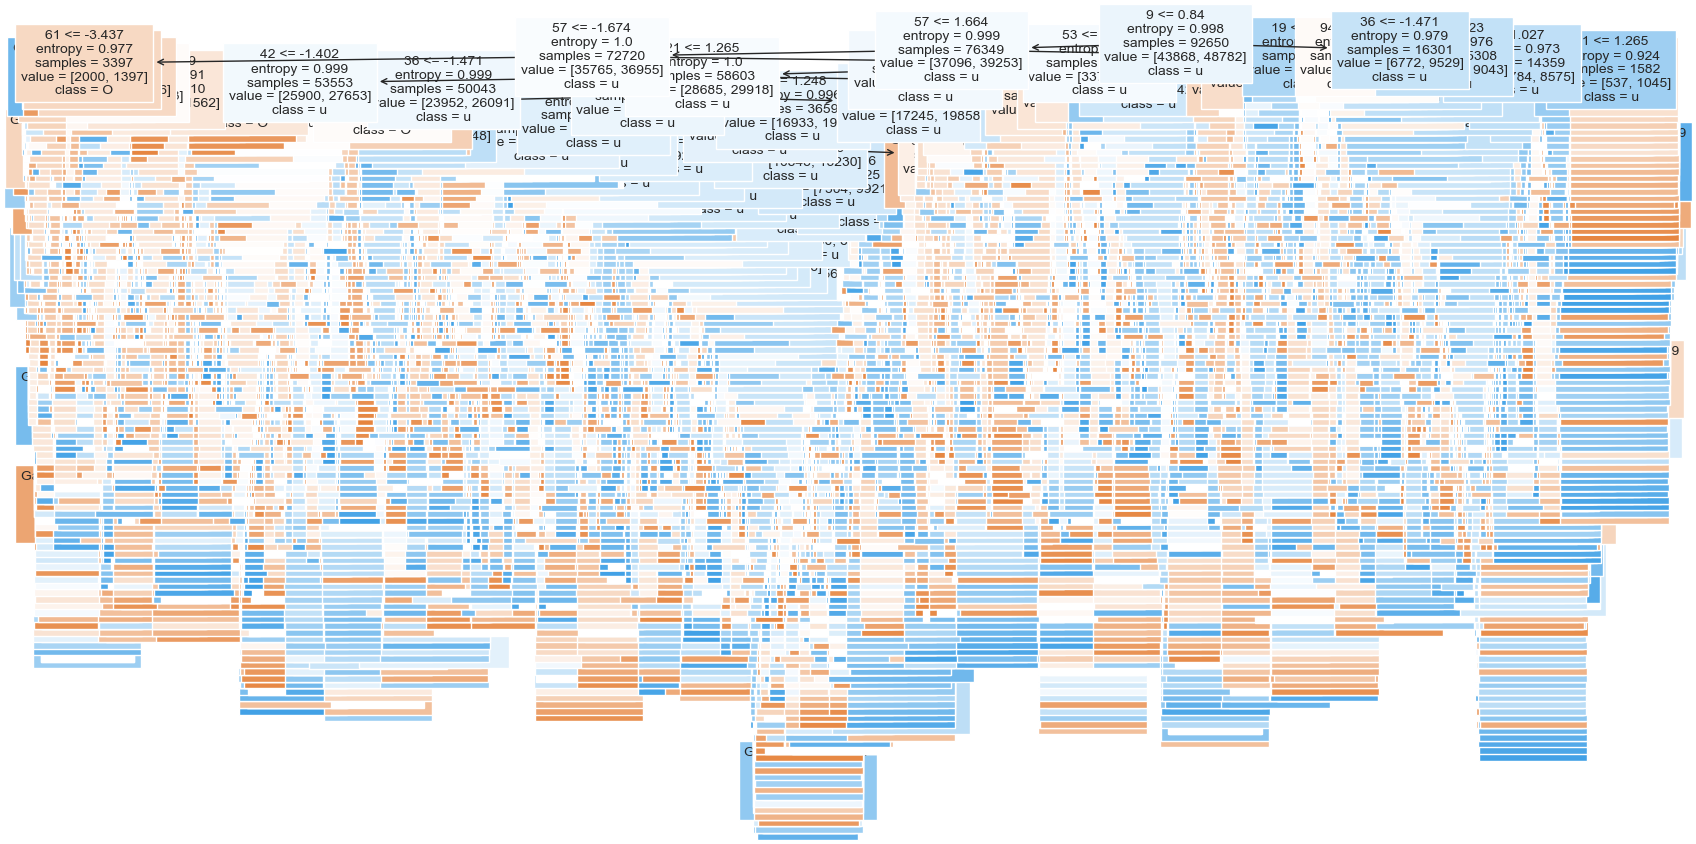

In [105]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Applying the pruning by penalizing the tree complexity with the optional parameter $\texttt{ccp}$_$\texttt{alpha}$ according to the penalized function $\sum\limits_{p=1}^{|T|} \Big(-\sum\limits_{k=1,K}f_k \log(f_k) \Big)+ \alpha |T|$ and observe the difference with respect to the non-penalized one.

In [30]:
X_train, y_train = make_classification(n_samples=92650, n_features=115, n_classes=2,\
                           n_clusters_per_class=1, flip_y=0.15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_test, y_test = make_classification(n_samples=10294, n_features=115, n_classes=2,\
                           n_clusters_per_class=1, flip_y=0.15)

#  number of classes = 2 since we have -1 or 1.
tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')


training accuracy 1.0
 testing accuracy 0.45502234311249273


In [28]:
print(X_train.shape)
X_test.shape

(92650, 115)


(10294, 115)

best alpha 0.001
training accuracy 0.8994063680518078
 testing accuracy 0.5407033223236837


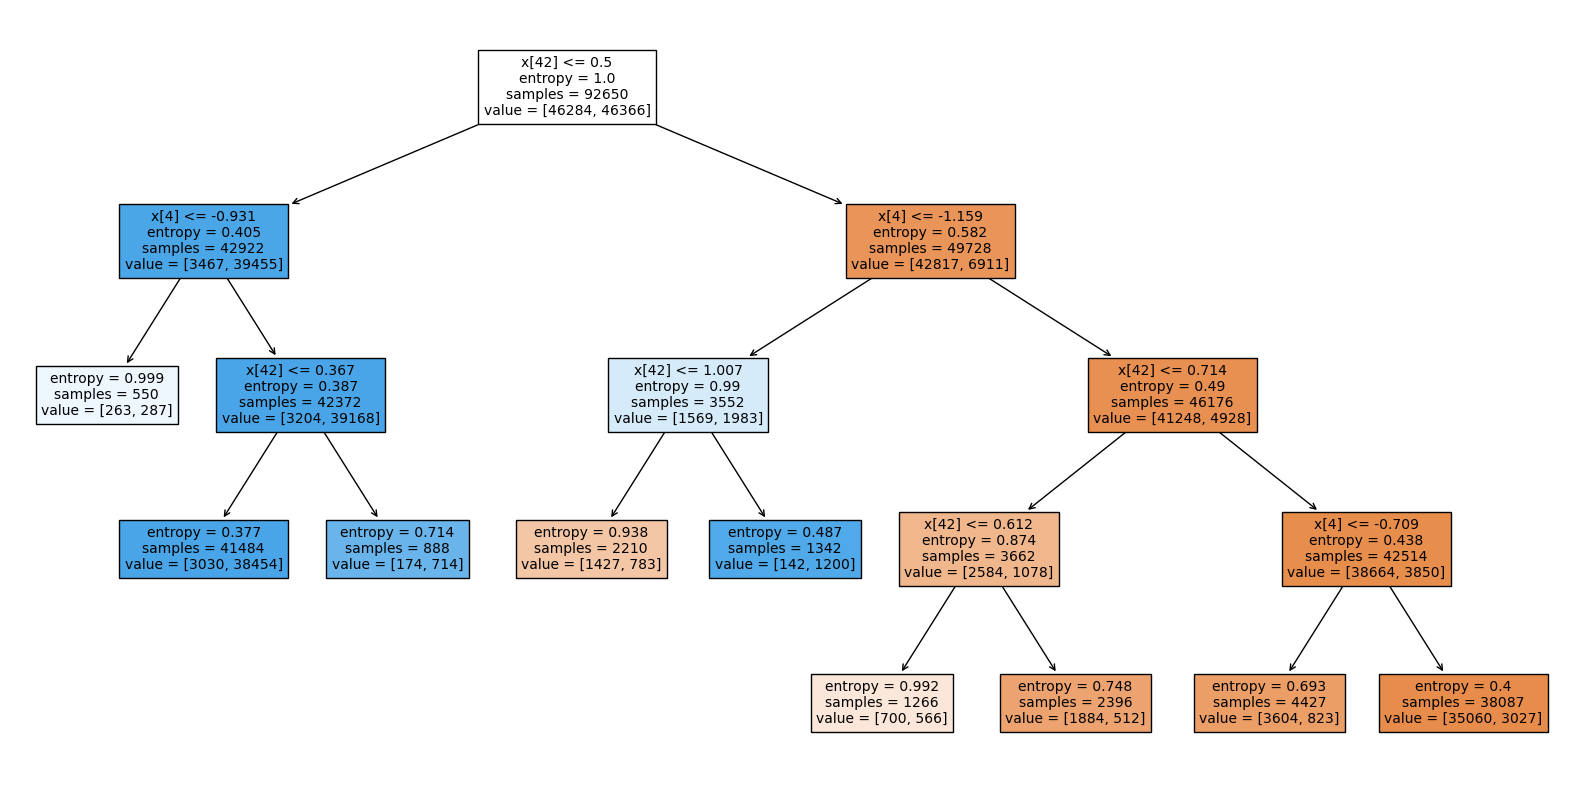

In [31]:
grid_of_values ={'ccp_alpha':[1, 0, 0.1,0.5, 0.01, 0.001]}
grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)
grid_model.fit(X_train,y_train)
best_alpha = grid_model.best_params_['ccp_alpha']
print(f'best alpha {best_alpha}')
tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=best_alpha)
tree_model.fit(X_train, y_train)

y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, filled=True)
plt.show()

In [34]:
training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train)
training_precision = precision_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test)
testing_precision = precision_score(y_test, y_predicted_test)
print('           ACC               BA                RECALL                  PRECISION')
print(f'training {training_acc},{training_ba},{training_recall},{training_precision}')
print(f'testing {testing_acc},{testing_ba},{testing_recall},{testing_precision}')


           ACC               BA                RECALL                  PRECISION
training 0.8994063680518078,0.8994263689013984,0.8768278479920631,0.918466473883969
testing 0.5407033223236837,0.5409320182590818,0.7763516141579152,0.5273447820343461


# C. Applying Support Vector Model (SVM) for the prediction. 

In [106]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_predicted_train = svm_model.predict(X_train)
y_predicted_test = svm_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
training_ba = balanced_accuracy_score(y_train, y_predicted_train)
training_recall = recall_score(y_train, y_predicted_train)
training_precision = precision_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
testing_ba = balanced_accuracy_score(y_test, y_predicted_test)
testing_recall = recall_score(y_test, y_predicted_test)
testing_precision = precision_score(y_test, y_predicted_test)
print('           ACC               BA                RECALL                  PRECISION')
print(f'training {training_acc},{training_ba},{training_recall},{training_precision}')
print(f'testing {testing_acc},{testing_ba},{testing_recall},{testing_precision}')

           ACC               BA                RECALL                  PRECISION
training 0.7776686454398273,0.7745803946253467,0.8328071829773277,0.7655316663212045
testing 0.5851952593743929,0.5801695498191886,0.6530352599054889,0.6034598589183742


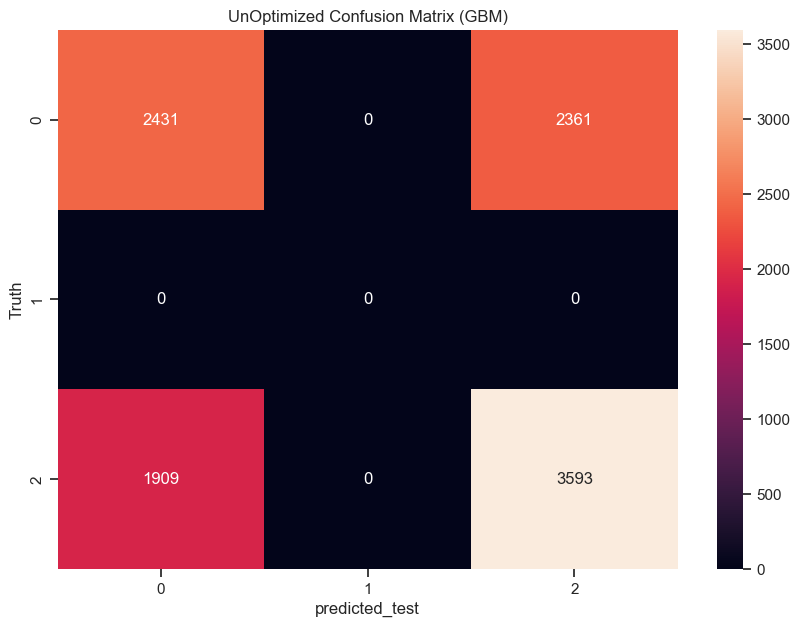

[[2431 2361]
 [1909 3593]]


In [112]:
# Now let's visualize prediction performance on a confusion matrix in seaborn

y_test = np.array(y_test, dtype=np.int64)
y_predicted_test = np.array(y_predicted_test, dtype=np.int64)

# Convert labels to non-negative values
y_test_non_negative = y_test - np.min(y_test)
y_predicted_test_non_negative = y_predicted_test - np.min(y_predicted_test)

# Compute the confusion matrix
cm_plot = tf.math.confusion_matrix(labels=y_test_non_negative, predictions=y_predicted_test_non_negative)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm_plot, annot=True, fmt='d')
plt.xlabel('predicted_test')
plt.ylabel('Truth')
plt.title('UnOptimized Confusion Matrix (GBM)')
plt.show()
print(confusion_matrix(y_test, y_predicted_test))

In [113]:
print(accuracy_score(y_test, y_predicted_test))
print(classification_report(y_test, y_predicted_test))

0.5851952593743929
              precision    recall  f1-score   support

          -1       0.56      0.51      0.53      4792
           1       0.60      0.65      0.63      5502

    accuracy                           0.59     10294
   macro avg       0.58      0.58      0.58     10294
weighted avg       0.58      0.59      0.58     10294



In [114]:
#the proportion of correct predictions over total predictions. It's a common metric for classification tasks.
print("Training Accuracy:", metrics.accuracy_score(y_train, y_predicted_train))
#average of recall obtained on each class. It's useful for imbalanced datasets.
print("Training Balanced Accuracy:", metrics.balanced_accuracy_score(y_train, y_predicted_train))
#the proportion of actual positive cases that were correctly identified.
print("Training Recall:", metrics.recall_score(y_train, y_predicted_train, average='weighted'))
#the proportion of predicted positive cases that were correct.
print("Training Precision:", metrics.precision_score(y_train, y_predicted_train, average='weighted'))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_predicted_test))
print("Testing Balanced Accuracy:", metrics.balanced_accuracy_score(y_test, y_predicted_test))
print("Testing Recall:", metrics.recall_score(y_test, y_predicted_test, average='weighted'))
print("Testing Precision:", metrics.precision_score(y_test, y_predicted_test, average='weighted'))


Training Accuracy: 0.7776686454398273
Training Balanced Accuracy: 0.7745803946253467
Training Recall: 0.7776686454398273
Training Precision: 0.7789831960949783
Testing Accuracy: 0.5851952593743929
Testing Balanced Accuracy: 0.5801695498191886
Testing Recall: 0.5851952593743929
Testing Precision: 0.583293047624651
